# Exploratory Data Analysis of Retail


> By Shashwat Dev


### In this project, we will analyse the data of a Superstore and identify ways to increase profit

## Preparing the Environment
We will import the required libraries and read in the data set.
*   Pandas - Data manipulation
*   Matplotlib and Seaborn - Data visualisation

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [89]:
df=pd.read_csv("SampleSuperstore.csv")

## Data Exploration
> Let's have a look at the data using df.head() and df.tail() function.

In [90]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [91]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

We can easily tell that there is a mix of categorical, geographical and numerical variables.

Each row represents an order of an item and the corresponding quantity, sales, discount and profit. There is also the mode of shipment, customer segment and geographical aspects.

Next, we will use the df.shape() and df.info() to get more information.

In [92]:
df.shape

(9994, 13)

### Metadata of dataset

In [93]:
# Summarised information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [94]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning
Before we start with the analysis, we must first clean the data or "scrub the dirt".

For this analysis, we will look at the more common issues such as missing and duplicate data.
##Handling Missing Values
Next we will find out whether there is Null values.

In [95]:
# Finding the number of null values for all columns
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The result shows that the data set does not have any null value.

In [96]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Handling Dublicate Data

In [97]:
# Find the number of duplicate data
df.duplicated().sum()

17

So, there are 17 duplicated rows. Now let's run another function to view the duplicate data.

In [98]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [99]:
# Drop the duplicated rows
df.drop_duplicates(inplace = True)

In [100]:
# Finding the no. of rows and columns
df.shape

(9977, 13)

So,we can confirm that the duplicated rows have been dropped as the rows were 9993 before and now it's reduced to 9977 rows.

## Descriptive Statistics
Here, we will do a descriptive statistical analysis. We use df.describe() and assign 'include = 'all' to ensure that categorical features are also included in the output.

In [101]:
# Get descriptive statistics summary
df.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


Here we see 'NaN' in some of the categorical columns and that's perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.





## Exploratory Data Analysis

In [102]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


## Heatmap for Correlation

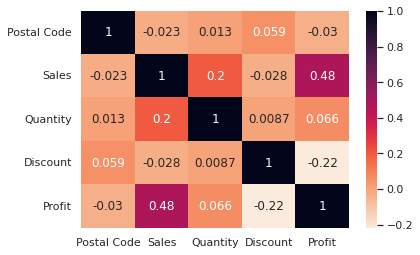

In [103]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

From above Heatmap:


*   Sales and Profit are Moderately Correlated.
*   Discount and Profit are Negatively Correlated
*   Quantity and Profit are less Moderately Correlated.





## Category Wise Analysis

In [104]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


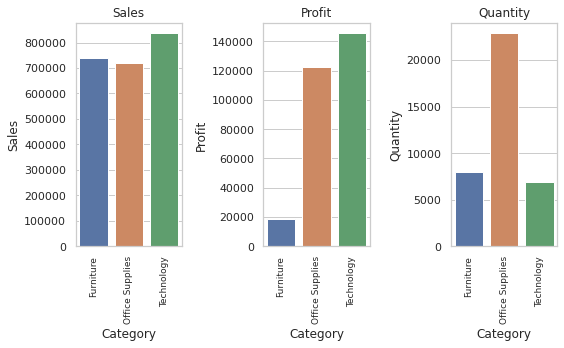

In [105]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Observations are:
*   Technology is Best Selling and it's good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4-5 years.
*   Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
*   Office Supplies sells the most in terms of quantity as it is relatively cheap product.

In [106]:
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [107]:
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [108]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


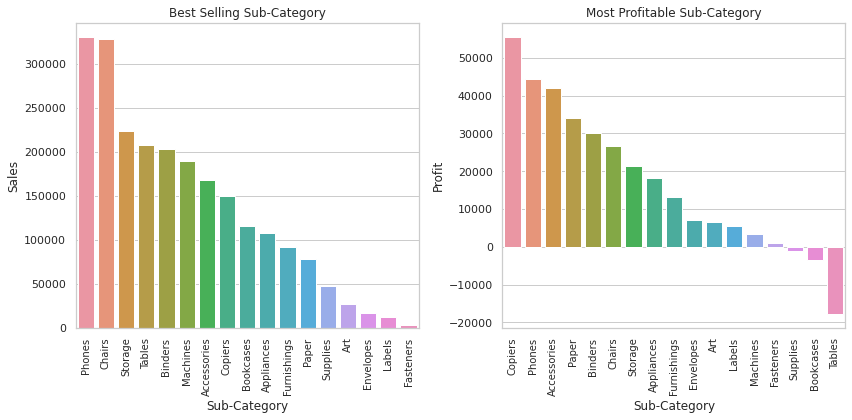

In [109]:
# Plot Bar Plots

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

Let's analyse the bar plots:

*   Phones and Chairs are Top 2 best selling sub-category.
*   Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
*  On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### Profits for each state

In [110]:
prof_df = df.groupby('State', as_index=False)['Profit'].sum()
prof_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579


Analysing Profit/Loss based on State

### The graph shows us the overall profit as well as loss (negative values) for each state. The profit/loss is calculated by adding individual values for each state

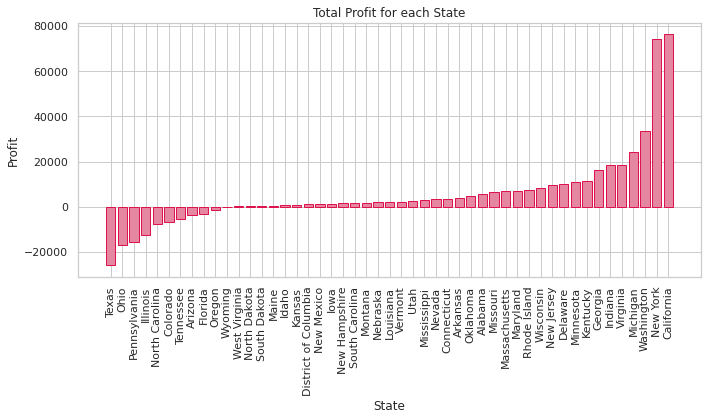

In [111]:
fig,ax = plt.subplots(figsize=(10,6))
prof_df=prof_df.sort_values('Profit')
ax.bar(prof_df['State'],prof_df['Profit'],color='#e687a2',edgecolor='#de124c') 
ax.set_title(label="Total Profit for each State", loc='center', pad=None)
ax.set_ylabel('Profit')
ax.set_xlabel('State')
ax.set_xticklabels(prof_df['State'],rotation=90)
plt.tight_layout();


From above bar chart we observe that

*   California has highest profit 
*   Texas has most loss


### Next graph shows us the profit or loss per Sale for each state

In [112]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


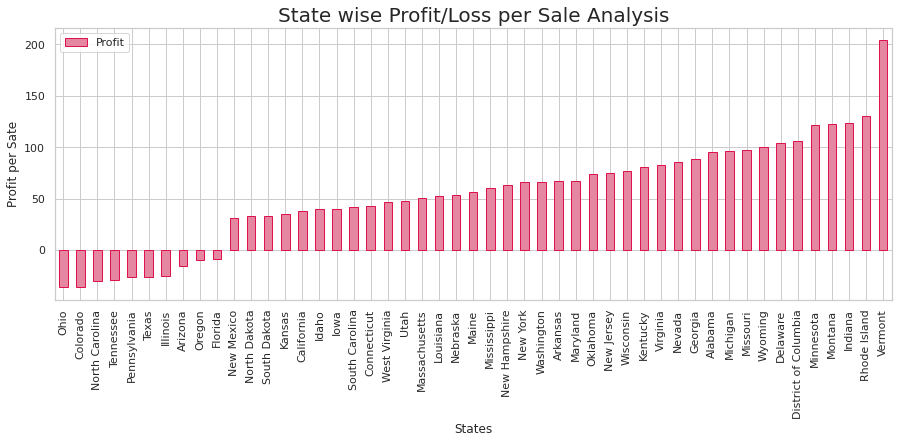

In [113]:
df_state1=df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind = 'bar', figsize = (15,5),color='#e687a2',edgecolor='#de124c')
plt.title('State wise Profit/Loss per Sale Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

From above bar chart we observe that

*   Vermont has highest profit per sale
*   Ohio has lowest profit per sale

## State Wise Analysis of Sales

Text(0.5, 1.0, 'State wise analysis of Sale')

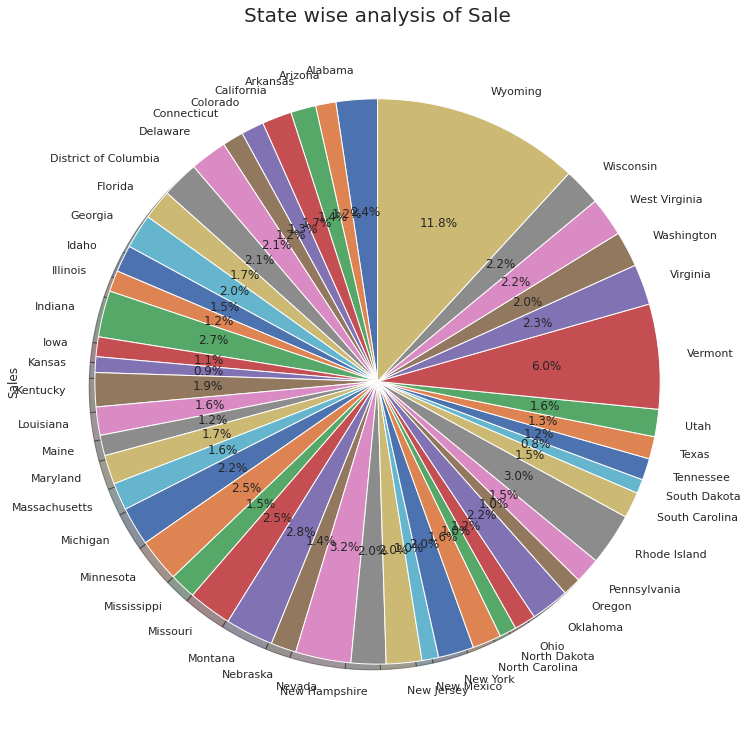

In [114]:
df_state['Sales'].plot(kind='pie',
                        figsize = (13,13),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State wise analysis of Sale',fontsize=20)

From the above pie chart we observe that
*   Highest amount of sales are in Wyoming(11.8%)
*   Lowest amount of sales are in South Dakota(0.8%)

### This plot shows us the range of profit for each discount value. The maximum, minimum as well as median range for each discount value is shown. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


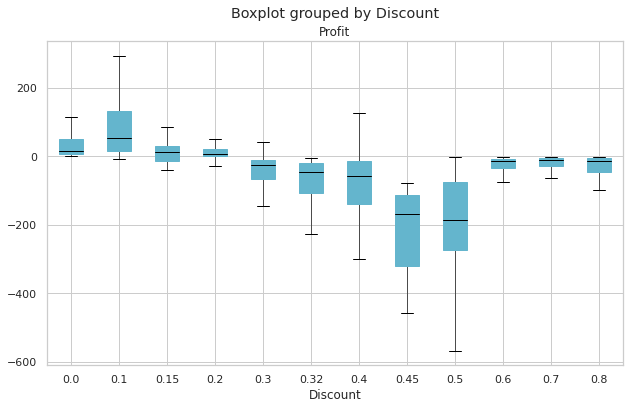

In [115]:
props = dict(boxes="c", medians="Black", caps="black")
df.boxplot(by='Discount', column='Profit',showfliers=False,figsize=(10,6),patch_artist=True,color=props)

## Count Plot of Each Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

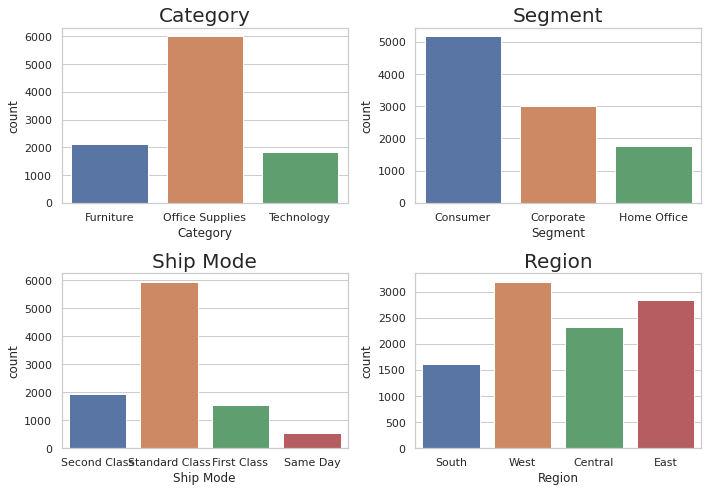

In [116]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sub-Category')

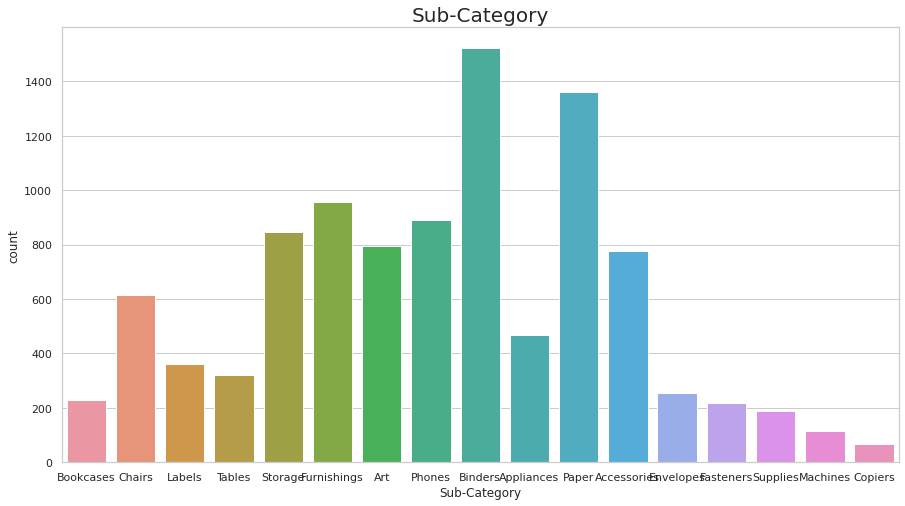

In [117]:
plt.figure(figsize=(15,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'State')

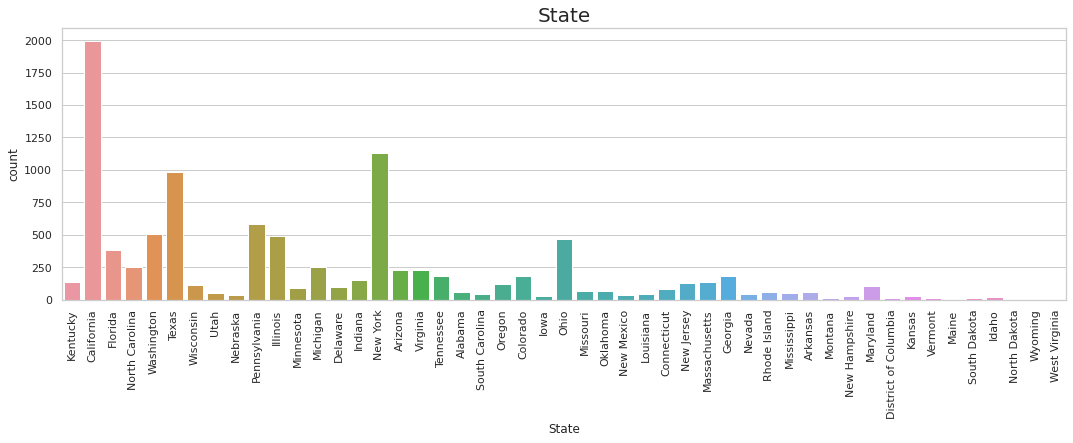

In [118]:
plt.figure(figsize=(18,5))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantity')

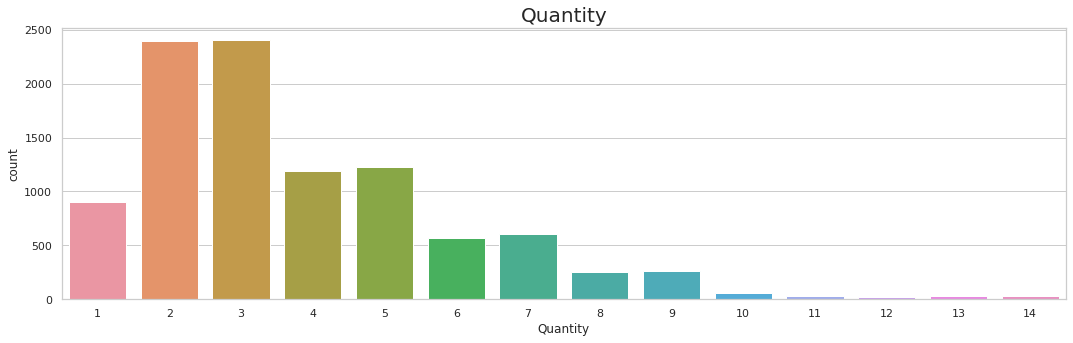

In [119]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Discount')

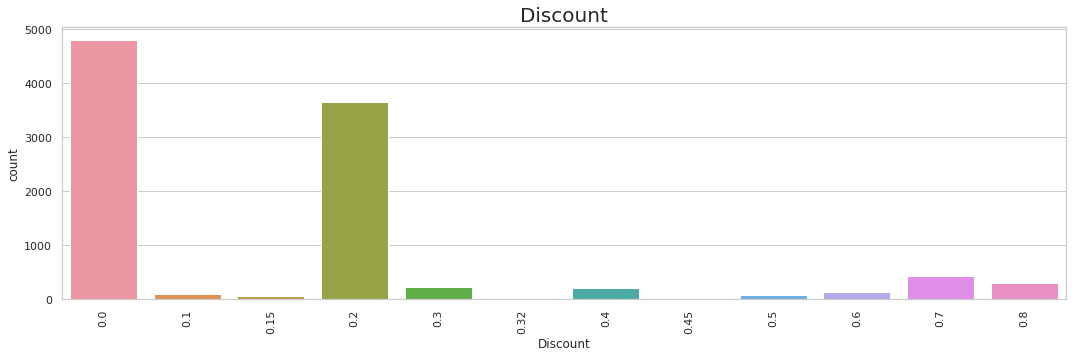

In [120]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

## Distribution of the data using the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

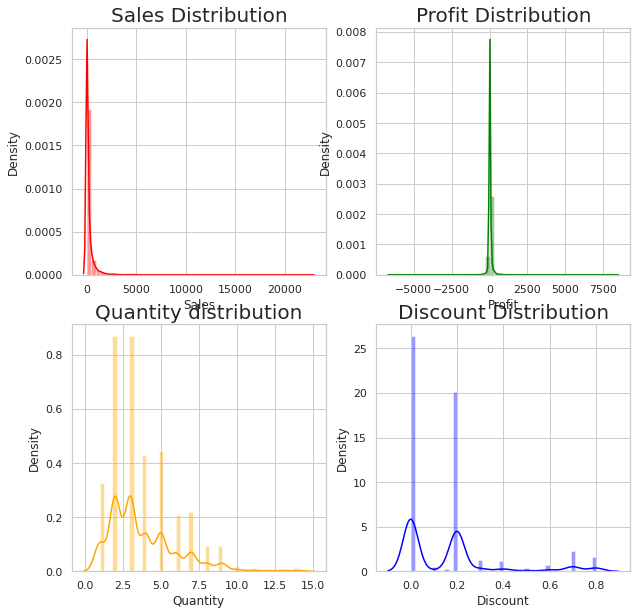

In [121]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

# Now lets start Analysing Loss based on various factors

## 1. Based on State

> First we will get all the states which faced loss and find their total profit/loss across all items.



In [122]:
state_neg=prof_df.loc[prof_df.Profit < 0]
state_neg

,State,Profit
41,Texas,-25750.9833
33,Ohio,-16959.3178
36,Pennsylvania,-15565.4035
11,Illinois,-12601.6500
31,North Carolina,-7490.9122
4,Colorado,-6527.8579
40,Tennessee,-5341.6936
1,Arizona,-3427.9246
8,Florida,-3399.3017
35,Oregon,-1194.0993


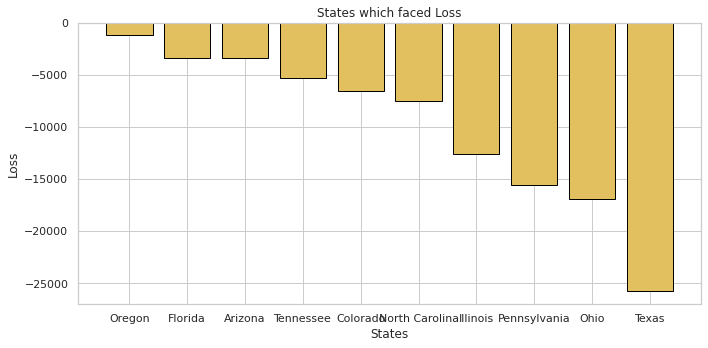

In [123]:
state_neg=state_neg.sort_values('Profit',ascending=0)
fig,ax = plt.subplots(figsize=(10,5))
def plot_state(ax):
    ax.bar(state_neg['State'],state_neg['Profit'],color='#e3c05f',edgecolor='black') 
    ax.set_title(label="States which faced Loss", loc='center', pad=None)
    ax.set_ylabel('Loss')
    ax.set_xlabel('States')
plot_state(ax)
plt.tight_layout()

Here we have visualised loss faced by various states:
1. TEXAS
2. OHIO
3. PENNSYLVANIA

## 2. Based on Region


> We will find the count of losses faced by various states and visualise them based on their Region.



In [124]:
state_neg2=df.loc[df.Profit < 0].reset_index(drop=True)
state_pos2=df.loc[df.Profit >= 0].reset_index(drop=True)
dft=state_neg2.groupby(['Region','State'], as_index=False)['Profit'].count()
dft=dft[dft.Profit > 40]
dft

,Region,State,Profit
0,Central,Illinois,254
1,Central,Texas,486
8,East,New York,47
9,East,Ohio,208
10,East,Pennsylvania,278
13,South,Florida,126
14,South,North Carolina,68
15,South,Tennessee,65
16,West,Arizona,85
17,West,California,105


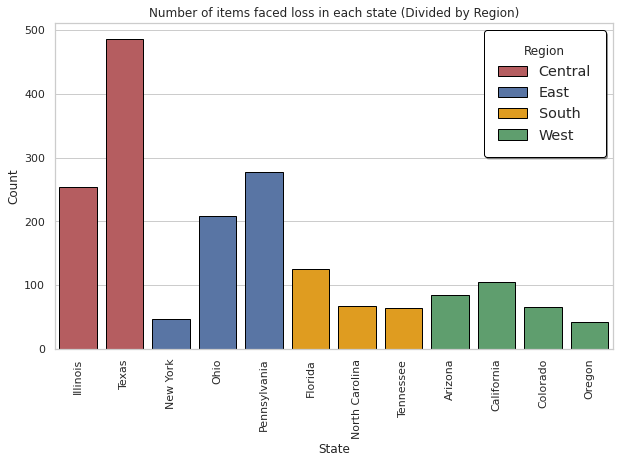

<Figure size 432x288 with 0 Axes>

In [125]:
fig,ax = plt.subplots(figsize=(10,6))
def plot_region(ax):
    d={'Central':'r','East':'b','South':'orange','West':'g'}
    dft['color'] = dft['Region'].map(d)
    sns.barplot(data=dft, x=dft.State, y='Profit', hue='Region', palette=d, dodge=False, edgecolor='black')
    ax.set_xticklabels(dft['State'],rotation=90)
    ax.set_title(label="Number of items faced loss in each state (Divided by Region)", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('State')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, title="Region", shadow=True)
    plt.show()
plot_region(ax)
plt.tight_layout()


It can be seen that regions like CENTRAL and East have maximum loss count along with the specific states in that region.

## 3. Based on Category


> Now we will plot total number of items belonging to each category which faced loss



In [126]:
state_pos2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0).sort_values()
state_neg2['Discount'].value_counts().reindex(df.Discount.unique(), fill_value=0)
state_pos2.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694


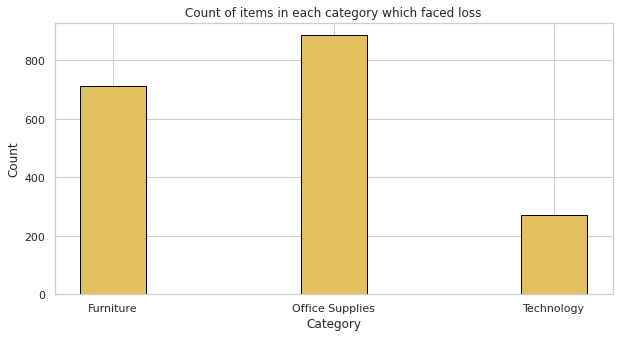

In [127]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_cat(ax):
    dftn=state_neg2.groupby('Category', as_index=False)['Profit'].count()
    ax.bar(dftn['Category'],dftn['Profit'],color='#e3c05f',edgecolor='black',width=0.3)
    ax.set_title(label="Count of items in each category which faced loss", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('Category')
plot_cat(ax)
plt.show()

It can be seen that maximum items belonging to OFFICE SUPPLIES category have faced loss followed by FURNITURE

### Now lets find the effect of Profit and Discount on each Category

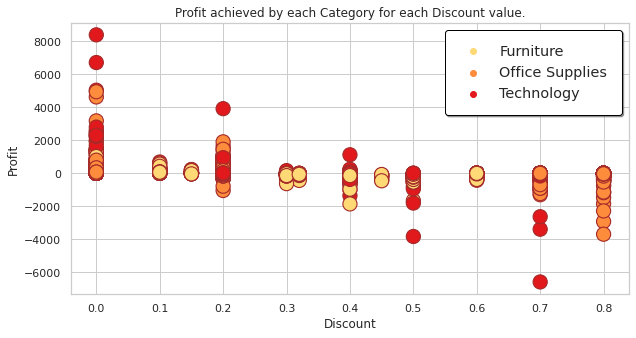

In [128]:
fig,ax = plt.subplots(figsize=(10,5))
def plot_disccat(ax):
    sns.scatterplot(x="Discount", y="Profit", data=df, hue="Category",ax=ax,s=200,palette='YlOrRd',edgecolor='brown')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
    ax.set_title('Profit achieved by each Category for each Discount value.')
plot_disccat(ax)
plt.show()

It can be seen that OFFICE SUPPLIES has faced maximum loss due to giving high discount (of 0.8) many times. Whereas other categories are profitable with low discounts.

### 4. Based on Discount


> Now we will find the count of discounts offered where the company faced profit and loss respectively.



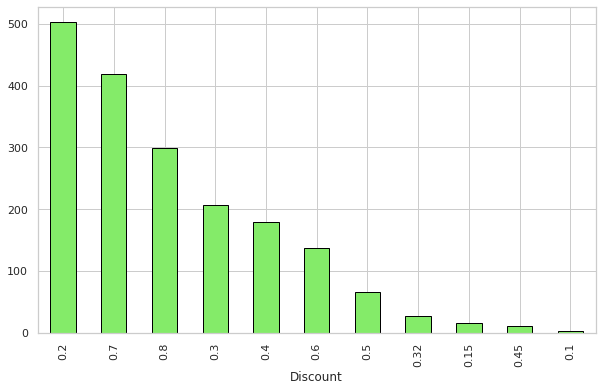

Text(0.5, 1.0, 'Count of discounts offered where\n store faced Loss')

In [129]:
fig,((ax1)) = plt.subplots(nrows=1, ncols=1,figsize=(10,6))
def plot_disc(ax,x):
    x['Discount'].value_counts().plot(kind = 'bar',color='#84EB69',edgecolor='black',ax=ax)
    ax.set_xlabel('Discount')
    plt.show()
plot_disc(ax1,state_neg2)
ax1.set_ylabel('Loss count')
ax1.set_title(label="Count of discounts offered where\n store faced Loss", loc='center', pad=None)

It can be seen that higher the Discount, higher is the Loss count.

Category wise sales, Discount, Profit analysis :

In [130]:
data_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
data_category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa98925a750>,
      dtype=object)

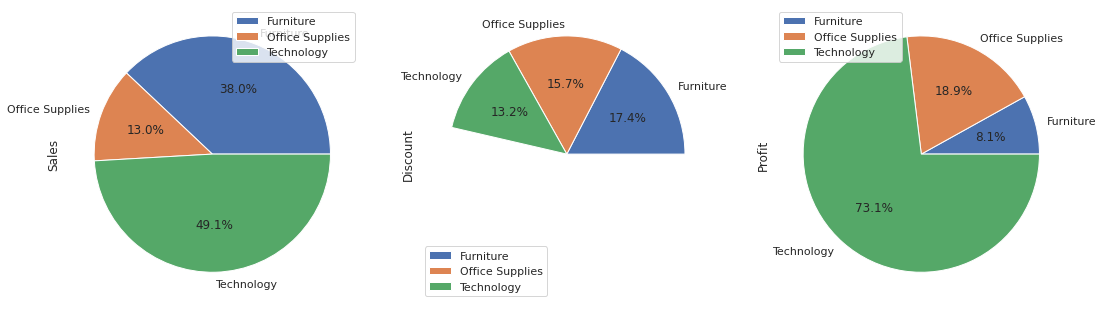

In [131]:
data_category.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', labels = data_category.index)


*   Maximun sales and Profit obtain in Technology.
*   Minimun profit obtain in Furniture





### Ship Mode wise sales, profit, discount

In [132]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa98945e150>,
      dtype=object)

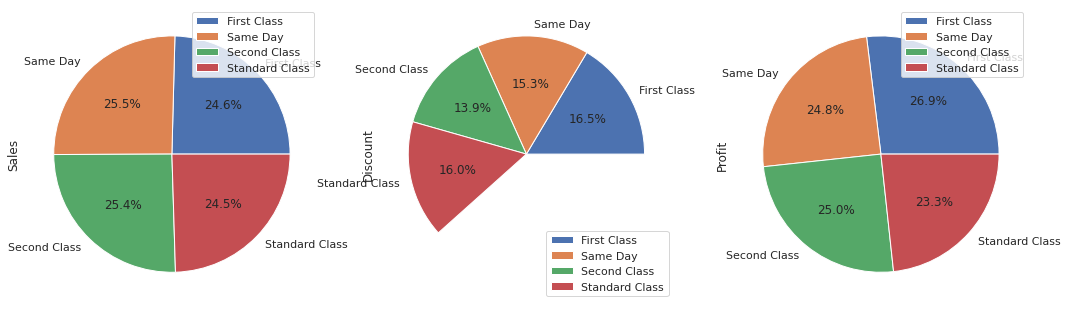

In [133]:
data_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
data_shipmode.plot.pie(subplots=True,figsize=(18, 20), autopct='%1.1f%%', labels = data_shipmode.index)

*   Profit and Discount is high in First Class
*   Sales is high for Same day ship

## Citywise Analysis of the Profit

In [134]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

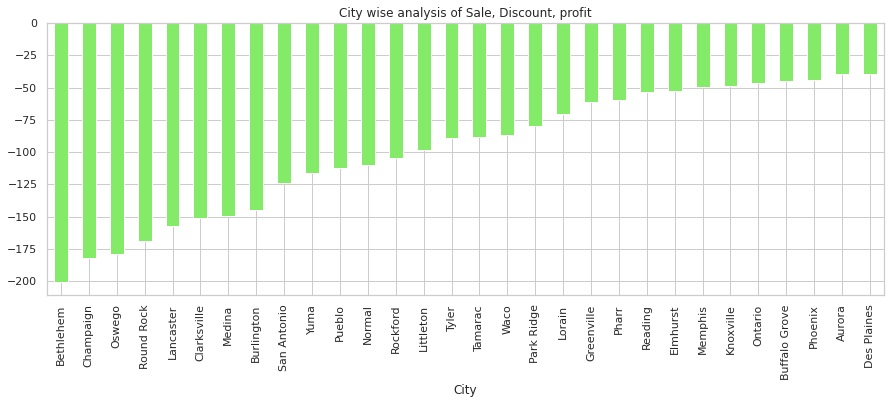

In [135]:
#1.Cities in loss
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = '#84EB69')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

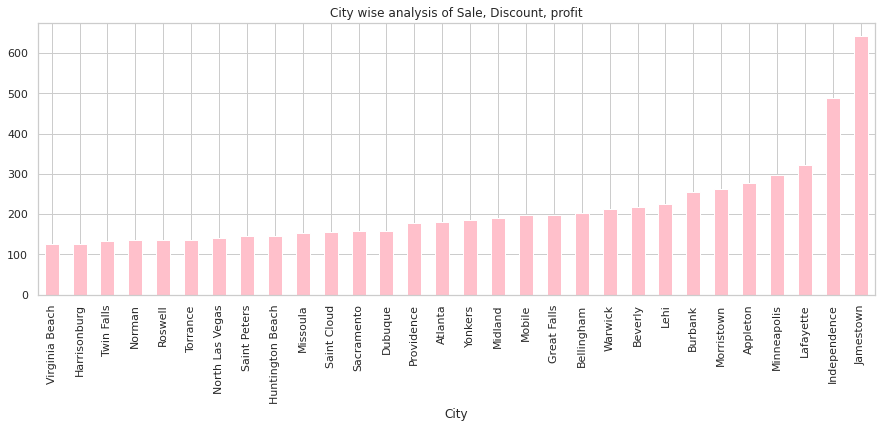

In [136]:
#Cities in Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'Pink')
plt.title('City wise analysis of Sale, Discount, profit')

## Strategic Recommendation


*   Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
*   Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
*   For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
*   For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
*   Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.





## For Additional Analysis insights, refer to [Tableau- Exploratory Data Analysis Retail](https://public.tableau.com/app/profile/shashwat.dev)